neural network classfication algorithm 

Import nessary libraires

In [39]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Input
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential

Reading excel file . it is the raisin dataset it contain 7 features along with class labels

In [55]:
data=pd.read_excel("random forest\Raisin_Dataset.xlsx")
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


in the data all are align in not mixing, so that we take the sample method it takes random data point in our data set. so that our model perform good pridiction

In [56]:
data=data.sample(900)
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
851,73699,408.585555,231.142084,0.824602,76106,0.703181,1079.578,Besni
516,202118,684.602958,379.719282,0.832080,209242,0.717219,1827.900,Besni
736,117301,507.240441,296.829882,0.810899,122361,0.618402,1407.401,Besni
78,76984,425.048186,233.973442,0.834859,78641,0.758755,1091.754,Kecimen
823,106897,481.794685,288.660020,0.800648,109314,0.715983,1284.690,Besni
...,...,...,...,...,...,...,...,...
211,46961,343.788528,177.136795,0.857040,48476,0.614633,891.528,Kecimen
562,84975,511.874664,215.448220,0.907107,88730,0.629612,1246.361,Besni
840,48551,302.812835,205.963380,0.733057,50748,0.742824,862.001,Besni
363,103377,460.670431,287.993173,0.780496,105569,0.726968,1230.233,Kecimen


Assign x variable as independent so that we remove the class label in that data

In [57]:
x=data.drop('Class',axis=1)

in deep learning we process the categorical data to as numeric form. so that we use label encoder to assign each class labels

In [58]:
le=LabelEncoder()
data['Class']=le.fit_transform(data['Class'])
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
851,73699,408.585555,231.142084,0.824602,76106,0.703181,1079.578,0
516,202118,684.602958,379.719282,0.832080,209242,0.717219,1827.900,0
736,117301,507.240441,296.829882,0.810899,122361,0.618402,1407.401,0
78,76984,425.048186,233.973442,0.834859,78641,0.758755,1091.754,1
823,106897,481.794685,288.660020,0.800648,109314,0.715983,1284.690,0
...,...,...,...,...,...,...,...,...
211,46961,343.788528,177.136795,0.857040,48476,0.614633,891.528,1
562,84975,511.874664,215.448220,0.907107,88730,0.629612,1246.361,0
840,48551,302.812835,205.963380,0.733057,50748,0.742824,862.001,0
363,103377,460.670431,287.993173,0.780496,105569,0.726968,1230.233,1


In [59]:
np.array([data.iloc[3,:7]])

array([[7.69840000e+04, 4.25048186e+02, 2.33973442e+02, 8.34859339e-01,
        7.86410000e+04, 7.58754595e-01, 1.09175400e+03]])

assign target variable as class columns

In [60]:
y=data['Class']

Here we splitting the data for 80 % training and 20 percentage for testing

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [62]:
sh=(x.shape[1],)
inputlayer=Input(shape=sh)

Here we create a model as sequential model, so we add the layer in sequentice order,the first layer is input layer it contain 7 neuron and next 2 layer is fully connected hidden layer it contain 10 neuron nodes and we use the relu as activation funtion it perform best classification and the last layer is ouptut layer it contain 1 neuron it has activation funtion as sigmoid. the sigmoid funtion is used as the binary classification 0 or 1

In [113]:
model=Sequential([
    Dense(7,activation='relu',input_shape=sh),
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(1,activation='sigmoid')
])

c:\Users\LENOVO\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Here we use to compile the model for the metrics as accuracy and loss is binary_crossentropy and optimize is adam

In [114]:
model.compile(optimizer='adam',                # Optimizer
              loss='binary_crossentropy',      # Loss function
              metrics=['accuracy'])            # Metrics to monitor


Here we print the model summary. it tell about how many layer and how many nodes are present in each layer and how many parameter are present in each layer

In [115]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,157 (82.64 KB)

 Trainable params: 21,157 (82.64 KB)

 Non-trainable params: 0 (0.00 B)

here we train the model with epoch=45 and use here validation data

In [120]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4983 - loss: 29.3163 - val_accuracy: 0.5722 - val_loss: 15.3201
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5261 - loss: 15.1539 - val_accuracy: 0.4667 - val_loss: 15.8873
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5489 - loss: 24.3130 - val_accuracy: 0.7667 - val_loss: 2.4829
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5762 - loss: 17.3001 - val_accuracy: 0.5278 - val_loss: 7.7322
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5814 - loss: 15.3002 - val_accuracy: 0.6722 - val_loss: 4.5027
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5781 - loss: 17.9559 - val_accuracy: 0.5333 - val_loss: 44.8117
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5550 - loss: 27.6920 - val_accuracy: 0.4667 - val_loss: 19.5164
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5716 - loss: 14.7757 - val_accuracy: 0.4667

here we plot the training accuracy and testing accuracy using matplotlib library

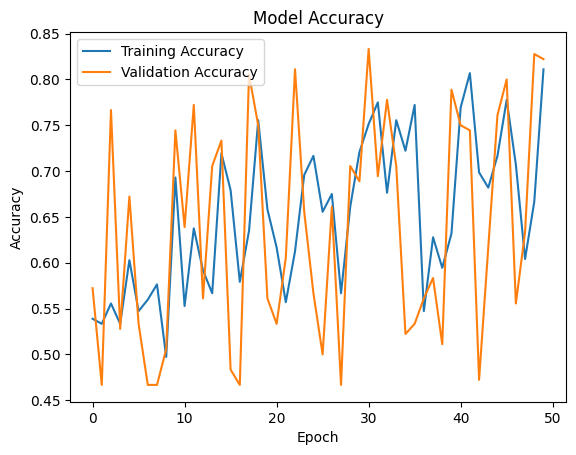

In [121]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Optional, if validation is used
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

here we plot loss both training and validation loss 

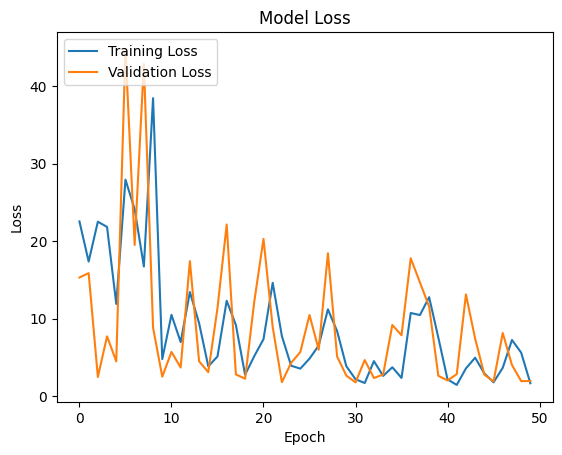

In [122]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')  
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


here we predict sample one data to classficy correct or not. our model it 80% work fine. so that it give correct answer

In [123]:
np.round(model.predict(np.array([data.iloc[3,:7]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[1.]], dtype=float32)